<h2 align='center' style='color:purple'>Outlier detection and removal using z-score and standard deviation in python pandas</h2>

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [2]:
df = pd.read_csv("heights.csv")
df.sample(5)

,gender,height
7851,Female,64.402180
2492,Male,69.260292
6335,Female,67.480737
869,Male,67.697104
6317,Female,62.656619


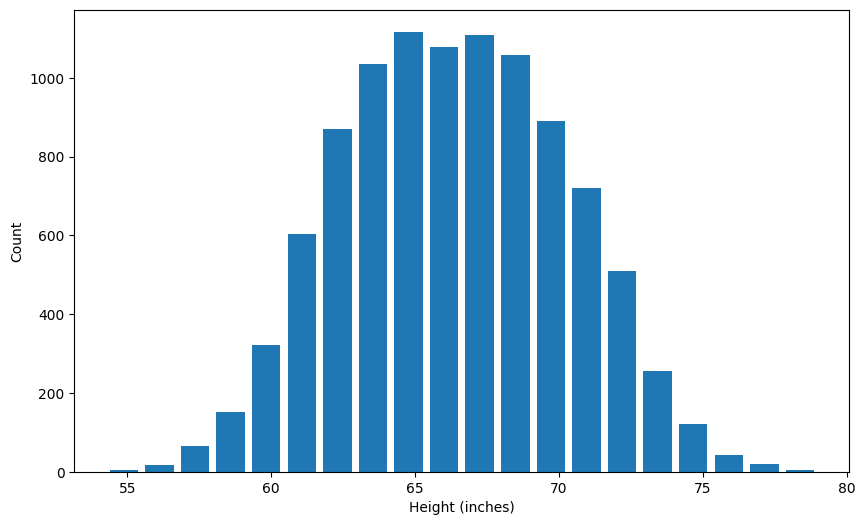

In [3]:
plt.hist(df.height, bins=20, rwidth=0.8)
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

Read this awesome article to get your fundamentals clear on normal distribution, bell curve and standard deviation. https://www.mathsisfun.com/data/standard-normal-distribution.html

**Plot bell curve along with histogram for our dataset**

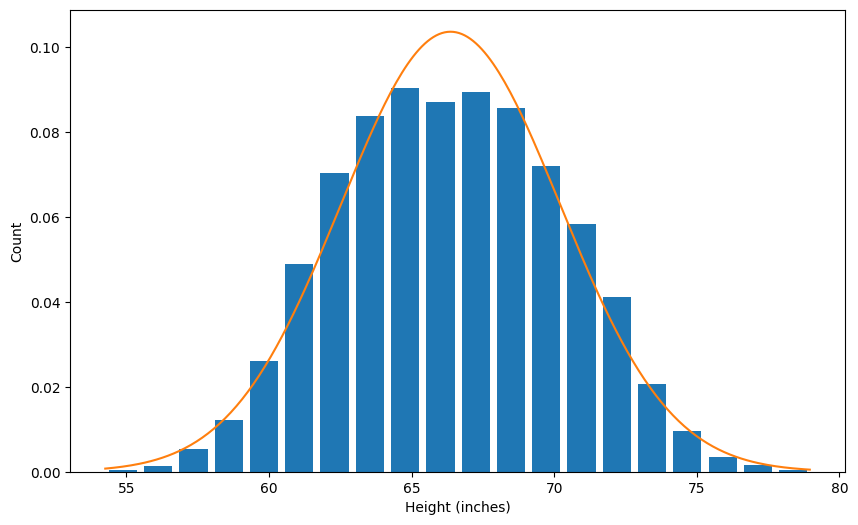

In [4]:
from scipy.stats import norm
import numpy as np
plt.hist(df.height, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(df.height.min(), df.height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.height.mean(),df.height.std()))

In [5]:
df.height.mean()

66.367559754866

In [6]:
df.height.std()

3.847528120795573

Here the mean is 66.37 and standard deviation is 3.84. 

<h3 style='color:blue'>(1) Outlier detection and removal using 3 standard deviation</h3>

One of the ways we can remove outliers is remove any data points that are beyond **3 standard deviation** from mean. Which means we can come up with following upper and lower bounds

In [7]:
upper_limit = df.height.mean() + 3*df.height.std()
upper_limit

77.91014411725271

In [8]:
lower_limit = df.height.mean() -3*df.height.std()
lower_limit

54.824975392479274

Here are the outliers that are beyond 3 std dev from mean

In [9]:
df[(df.height>upper_limit) | (df.height<lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


Above the heights on higher end is **78 inch** which is around **6 ft 6 inch**. Now that is quite unusual height. There are people who have this height but it is very uncommon and it is ok if you remove those data points.
Similarly on lower end it is **54 inch** which is around **4 ft 6 inch**. While this is also a legitimate height you don't find many people having this height so it is safe to consider both of these cases as outliers

**Now remove these outliers and generate new dataframe**

In [10]:
df_no_outlier_std_dev = df[(df.height<upper_limit) & (df.height>lower_limit)]
df_no_outlier_std_dev.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [11]:
df_no_outlier_std_dev.shape

(9993, 2)

In [12]:
df.shape

(10000, 2)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993) 

<h3 style='color:blue'>(2) Outlier detection and removal using Z Score</h3>

**Z score is a way to achieve same thing that we did above in part (1)**

**Z score indicates how many standard deviation away a data point is.**

For example in our case mean is 66.37 and standard deviation is 3.84. 

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

<h3 style='color:purple'>Calculate the Z Score</h3>

In [13]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [14]:
(73.84-66.37)/3.84

1.9453124999999998

**Get data points that has z score higher than 3 or lower than -3. Another way of saying same thing is get data points that are more than 3 standard deviation away**

In [15]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [16]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


Here is the list of all outliers 

In [17]:
df[(df.zscore<-3) | (df.zscore>3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


<h3 style='color:purple'>Remove the outliers and produce new dataframe</h3>

In [18]:
df_no_outliers = df[(df.zscore>-3) & (df.zscore<3)]
df_no_outliers.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


In [19]:
df_no_outliers.shape

(9993, 3)

In [20]:
df.shape

(10000, 3)

Above shows original dataframe data 10000 data points. Out of that we removed 7 outliers (i.e. 10000-9993) 

<h3 style='color:purple'>Exercise</h3>

You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe. 

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [23]:
import pandas as pd
df = pd.read_csv('../1_outliers/bhp.csv')

In [24]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


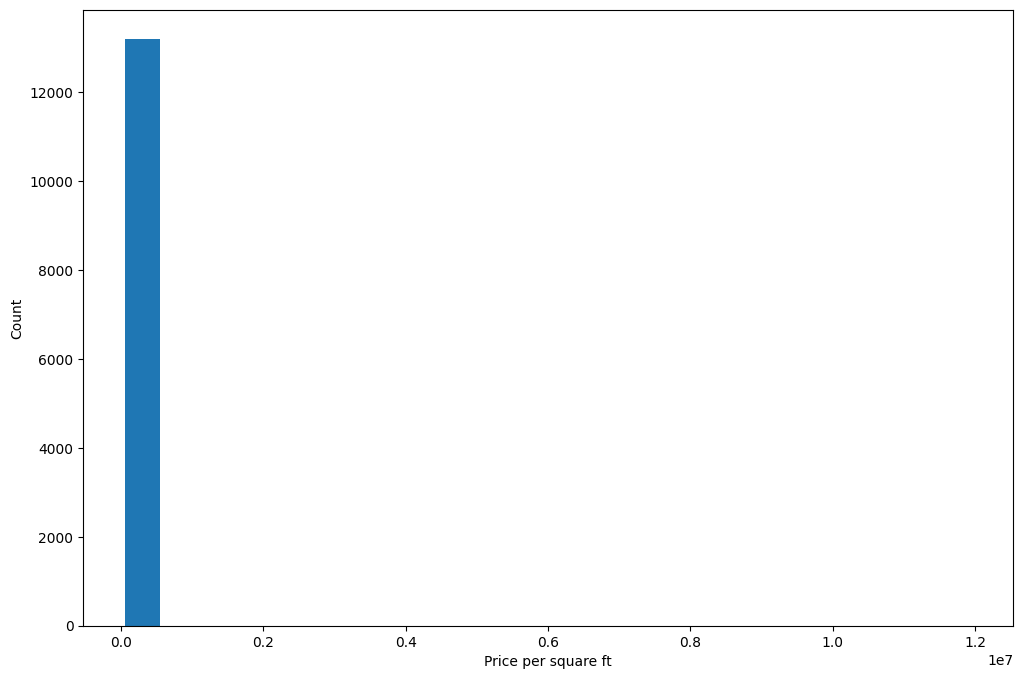

In [27]:
# Also plot histogram to see how is the data distribution
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

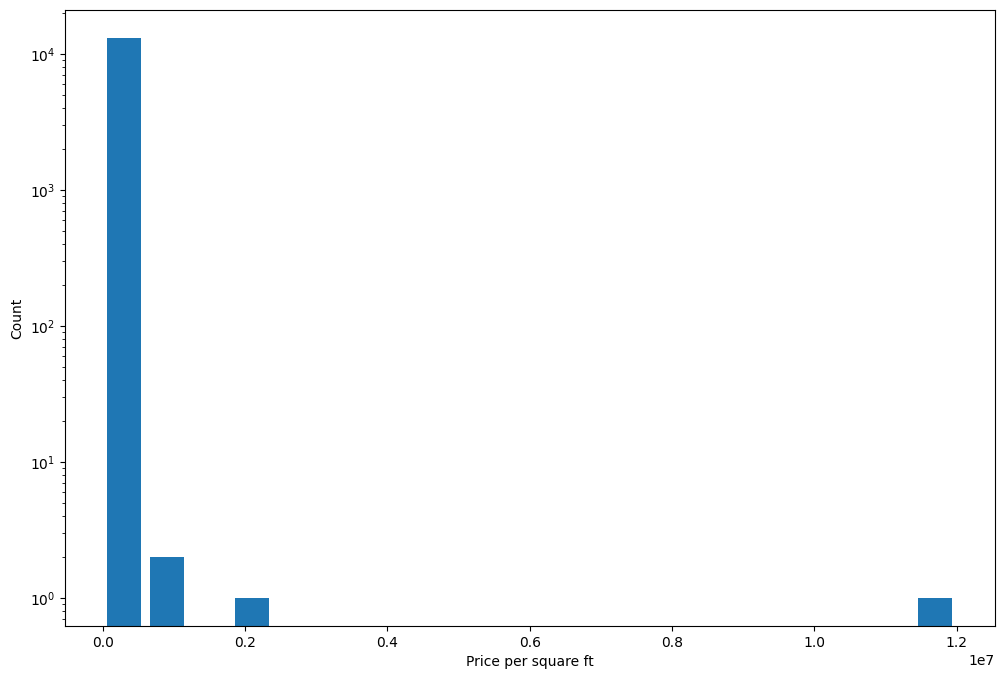

In [28]:
# Using log scale can make visualization little better

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [29]:
min_t,max_t = df.price_per_sqft.quantile([0.001,0.999])
min_t,max_t

(1366.184, 50959.36200000098)

In [36]:
outlier = df[(df['price_per_sqft']<min_t) | (df['price_per_sqft']>max_t)]

In [37]:
outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


In [39]:
df2 = df[(df.price_per_sqft<max_t) & (df.price_per_sqft>min_t)]
df2.shape

(13172, 7)

In [40]:
df.shape[0] - df2.shape[0]

28

# We removed total 28 outliers 

In [41]:
# (2) Now remove outliers using 4 standard deviation

In [44]:
max_limit = df2.price_per_sqft.mean() + 4 * df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4 * df2.price_per_sqft.std()
max_limit,min_limit

(23227.73653589432, -9900.429065502582)

In [45]:
df2[(df2.price_per_sqft>max_limit) | (df2.price_per_sqft<min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7908,HAL 2nd Stage,7 Bedroom,1000.0,7.0,250.0,7,25000
3340,other,19 BHK,2000.0,16.0,490.0,19,24500
10536,other,4 Bedroom,2400.0,4.0,595.0,4,24791
3665,Koramangala,4 Bedroom,2400.0,6.0,600.0,4,25000
5909,other,5 Bedroom,1240.0,5.0,300.0,5,24193
3144,other,5 BHK,8321.0,5.0,2700.0,5,32448
12631,Rajaji Nagar,5 Bedroom,2500.0,4.0,650.0,5,26000
10972,other,4 BHK,8321.0,5.0,2912.0,4,34995
12799,other,5 Bedroom,1650.0,5.0,450.0,5,27272
4357,other,4 Bedroom,3250.0,5.0,850.0,4,26153


In [46]:
df3 = df2[(df2.price_per_sqft>min_limit) & (df2.price_per_sqft<max_limit)]
df3.shape

(13047, 7)

In [47]:
df2.shape[0]-df3.shape[0]

125

# In this step we removed total 125 outliers

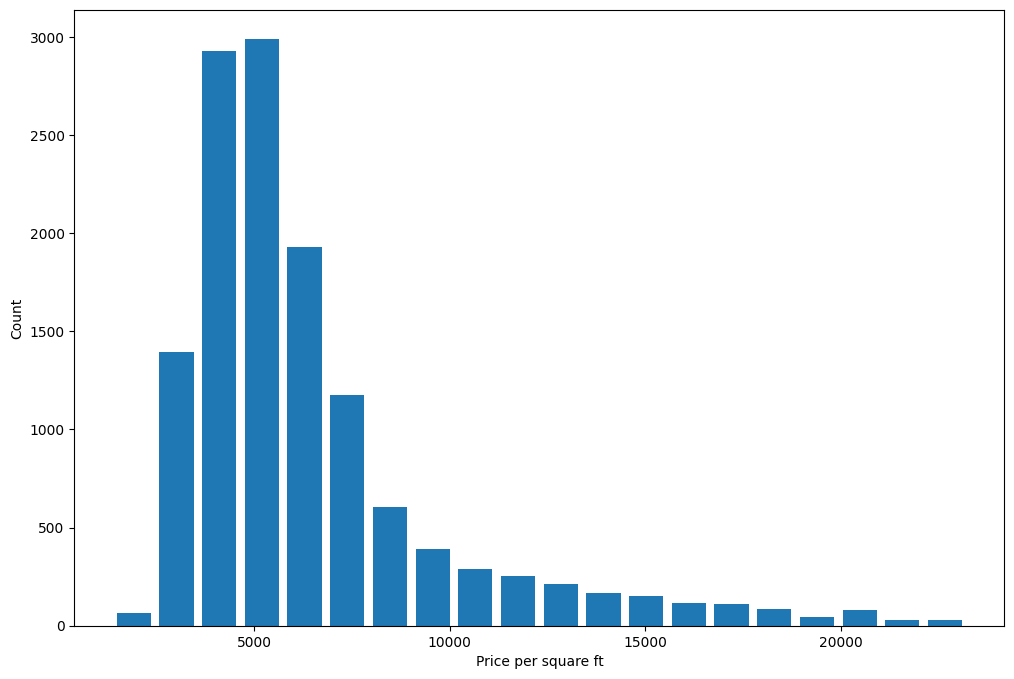

In [48]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

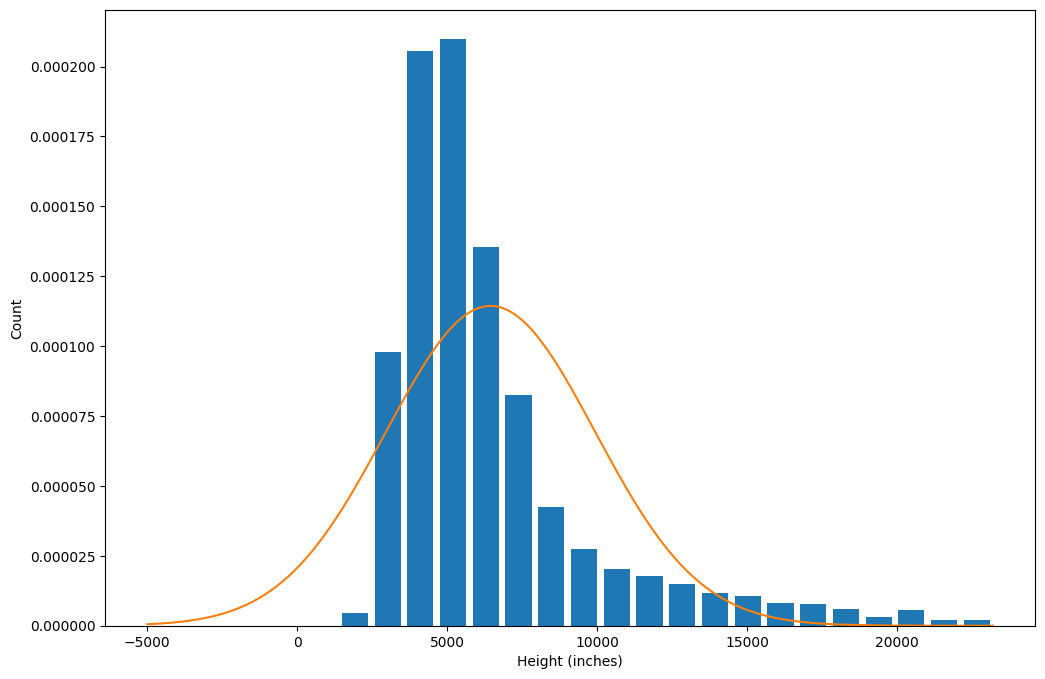

In [49]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng,df3.price_per_sqft.mean(),df3.price_per_sqft.std()))

In [50]:
# (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [51]:
df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\kp121\AppData\Local\Temp\ipykernel_13492\722868599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft-df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
7192,Nehru Nagar,2 BHK,967.0,2.0,41.10,2,4250,-0.582864
5388,Jakkur,3 BHK,1482.0,3.0,86.00,3,5802,-0.208078
7238,other,4 Bedroom,11000.0,5.0,2000.00,4,18181,2.781282
11821,Anekal,2 BHK,614.0,1.0,28.00,2,4560,-0.508004
9094,other,2 BHK,1095.0,2.0,55.85,2,5100,-0.377601
10005,other,3 BHK,1400.0,2.0,56.00,3,4000,-0.643236
160,other,3 BHK,1904.0,3.0,150.00,3,7878,0.293248
2705,Sompura,3 BHK,1025.0,2.0,37.00,3,3609,-0.737657
11242,Whitefield,3 BHK,2280.0,4.0,125.00,3,5482,-0.285353
10127,Hebbal,2 BHK,1420.0,2.0,99.39,2,6999,0.080982


In [52]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore>4)]
outliers_z.shape

(125, 8)

In [53]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674,4.107767
4609,other,4 Bedroom,1800.0,5.0,500.0,4,27777,5.098585
6134,Basavangudi,6 Bedroom,1754.0,6.0,650.0,6,37058,7.339820
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500,5.273180
12678,Chikkalasandra,5 Bedroom,1000.0,4.0,300.0,5,30000,5.635409


In [54]:
df4 = df2[(df2.zscore>-4)&(df2.zscore<4)]
df4.shape

(13047, 8)

In [55]:
df2.shape[0] - df4.shape[0]

125

In [56]:
# In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation